<h1><center><b>Yoga Pose Recognition </b></center></h1>


 <img src="https://previews.123rf.com/images/inarik/inarik1410/inarik141000014/32595833-joga-stanowi-sylwetka-kobiety-samodzielnie-na-bia%C5%82ym-tle-zestaw-ludzie-postaci-w-sport-gimnastyka-tr.jpg">



 ## **I'm trying only three poses:**

### ***Three_Class_Pose: T-Pose,Tree-Pose, Warrior-Pose,Unknown-Pose***

### **Steps:**

1. Install the MediaPipe package and OpenCV

2. Import Necessary Library

3. Initialize the Mp,Pose

4. Read Image and Identify Keypoint of human body

5. Pose Estimate the input image

6. Function in detect and recognition pose in keypoint using Mediapipe

7. Output_Prediction

<h1><center><b>Pose Estimation ---> MediaPipe</b></center></h1>

<img src="https://google.github.io/mediapipe/images/logo_horizontal_color.png">

MediaPipe is Google's open-source framework, used for media processing. It is cross-platform or we can say it is platform friendly. It is run on Android, iOS, web, and YouTube servers that's what Cross-platform means, to run everywhere.

 #### **Reference: MediaPipe-->[https://google.github.io/mediapipe/solutions/pose.html](http://)**

# **Install Package**

In [ ]:
!pip install opencv-python mediapipe

# **Import Necessary Library**

In [3]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from IPython.display import HTML

# **MediaPipe Package initialze**

In [4]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

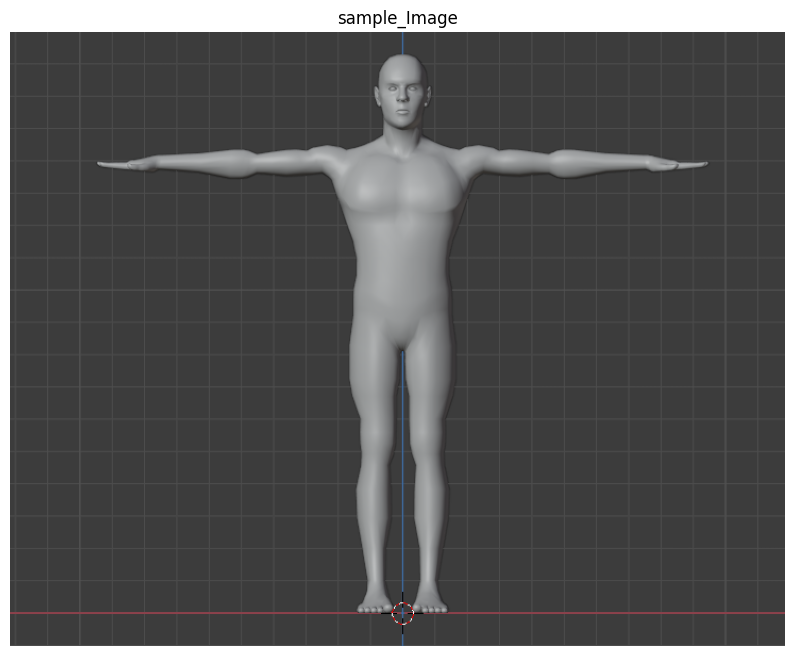

In [5]:
#Input_Image
sample_img  = cv2.imread('test.jpg')
plt.figure(figsize = [10,10])
plt.title("sample_Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

<h1><center><b>Landmark --> Keypoint_Identification</b></center></h1>

<img align='center' src="https://miro.medium.com/max/1400/1*-5YeZDrwsfHCGmOj8NFOsg.jpeg">

# **Identify Point in 2 keypoint_Landmark**

In [36]:
class Joint:
    def __init__(self, name, x,y):
        self.name = name
        self.x = x
        self.y = y
        

In [46]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
a=dict()
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(33):
        
        # Display the found normalized landmarks.
        name=(mp_pose.PoseLandmark(i).name).lower()
        x=results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x
        y=results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y
        print(name,x,y)
        a[name]=Joint(name,x,y)
        
        #print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x,results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x}')
        
        #print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

nose 0.509132981300354 0.11100906133651733
left_eye_inner 0.5157806873321533 0.0964084267616272
left_eye 0.5214388370513916 0.09698575735092163
left_eye_outer 0.5263804197311401 0.09760665893554688
right_eye_inner 0.4999580681324005 0.09481427073478699
right_eye 0.49436914920806885 0.09449806809425354
right_eye_outer 0.4888348877429962 0.09408101439476013
left_ear 0.5312409400939941 0.1038847267627716
right_ear 0.4798665940761566 0.10173022747039795
mouth_left 0.5177717804908752 0.12892389297485352
mouth_right 0.49911895394325256 0.12820160388946533
left_shoulder 0.5867046117782593 0.21695159375667572
right_shoulder 0.4254636764526367 0.21155798435211182
left_elbow 0.7055097222328186 0.21692848205566406
right_elbow 0.3043062090873718 0.2158355414867401
left_wrist 0.817444920539856 0.21465106308460236
right_wrist 0.2002696990966797 0.21825388073921204
left_pinky 0.8470127582550049 0.2102469950914383
right_pinky 0.1689174473285675 0.21817831695079803
left_index 0.8499553799629211 0.21033

In [47]:
def return_angle(landmark1, landmark2, landmark3):
    x1, y1 = landmark1.x, landmark1.y
    x2, y2 = landmark2.x, landmark2.y
    x3, y3 = landmark3.x, landmark3.y
    
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    if angle < 0:
        angle += 360
        
    # Return the calculated angle.
    return angle

In [48]:
return_angle(a['left_shoulder'],a['left_elbow'],a['left_wrist'])

178.84557435288704

In [ ]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

# **Generate CSV for landmark---> keypoint for each position(different poses keypoint convert to csv file)**

### ***Reference: [https://www.kaggle.com/venkatkumar001/pose-prediction-generate-csv-keypoints-mediapipe](http://)***



In [ ]:
# **Generate CSV for landmark---> keypoint for each position(different poses keypoint convert to csv file)**

### ***Reference: [https://www.kaggle.com/venkatkumar001/pose-prediction-generate-csv-keypoints-mediapipe](http://)***



# **Pose_Estimation**

In [ ]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

In [ ]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# **DetectPose and Recognition**

In [ ]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

In [ ]:
# Read another sample image and perform pose detection on it.
image = cv2.imread('../input/yoga-3pose-estimation/unknown.jpg')
detectPose(image, pose, display=True)

# **Calculate_Angle_Keypoints**

In [ ]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [ ]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

# **Class_Pose--> T-pose, Tree-pose, Warrior-Pose, Unknown**

In [ ]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.

    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose' 
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the T pose.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                # Specify the label of the pose that is tree pose.
                label = 'T Pose'

    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'
                
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0,0,255)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 5)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

# **Recognition_Pose**

In [ ]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('../input/yoga-3pose-estimation/tree.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [ ]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('../input/yoga-3pose-estimation/Tpose1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [ ]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('../input/yoga-3pose-estimation/warriorIIpose1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [ ]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('../input/yoga-3pose-estimation/unknown1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

## **Thankyou for Visiting Guys! If this notebook useful! Upvoted**
Reference: youtube(https://youtu.be/aySurynUNAw)